In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
housing = pd.read_csv('../datasets/housing_cleaned.csv')
housing.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [39]:
housing.head()

,id,pid,lot_area,street,alley,lot_shape,land_contour,utilities,condition_1,condition_2,...,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,109,533352170,13517,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,11492,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,153,535304180,7922,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,9802,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,255,906425045,14235,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation with Saleprice')

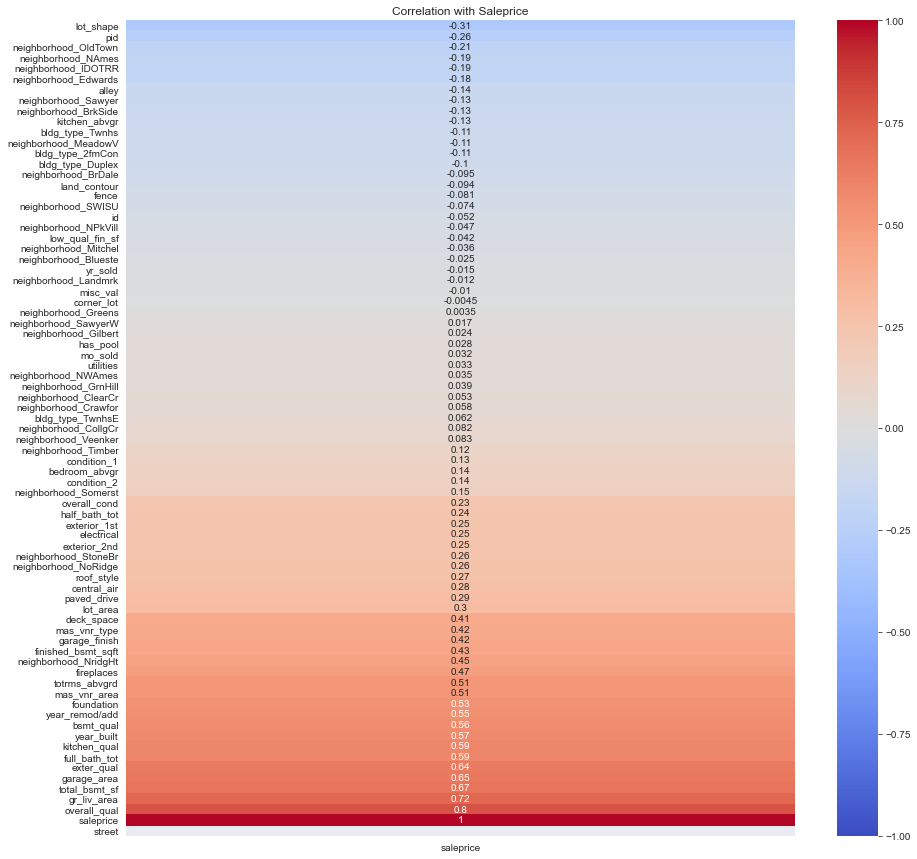

In [40]:
sns.set_style('dark')
plt.figure(figsize=(15,15))
correlation = housing.corr()[['saleprice']].sort_values('saleprice')
sns.heatmap(data = correlation,
    vmin= -1,
    vmax= 1,
    cmap= 'coolwarm',
    annot=True,
)

plt.title('Correlation with Saleprice')

Overall, there are a lot of very weak correlations between Sale Price and the variables created during the cleaning/feature engineering portion of our work. For our data visualizations we will be focusing on the variables with the strongest correlations.

Looking at sale price data

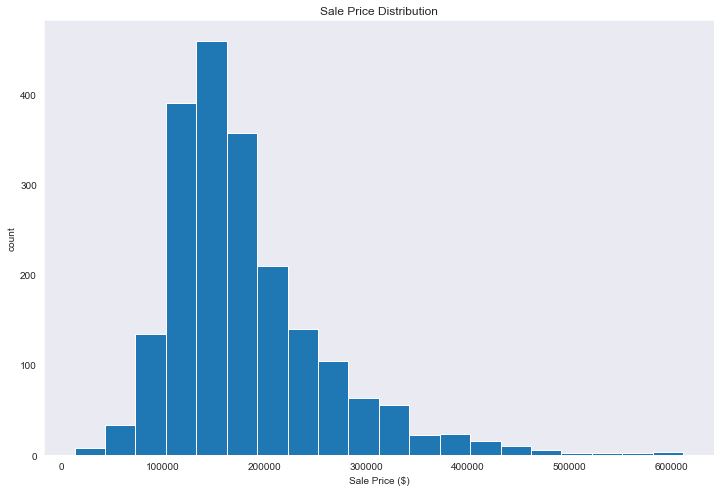

In [41]:
plt.figure(figsize=(12,8))
plt.hist(housing['saleprice'], bins = 20)
cutoff = 187303.4 + (3 * 79620)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('count')
plt.savefig('../figures/saleprice_histogram')
#distribution is skewed. will look again after dealing with outliers

Slightly right skewed, if our model struggles when predicting larger sale values, might be worth considering a log transformation of the dependent variable

C:\Users\jg_ri\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Sale Price')

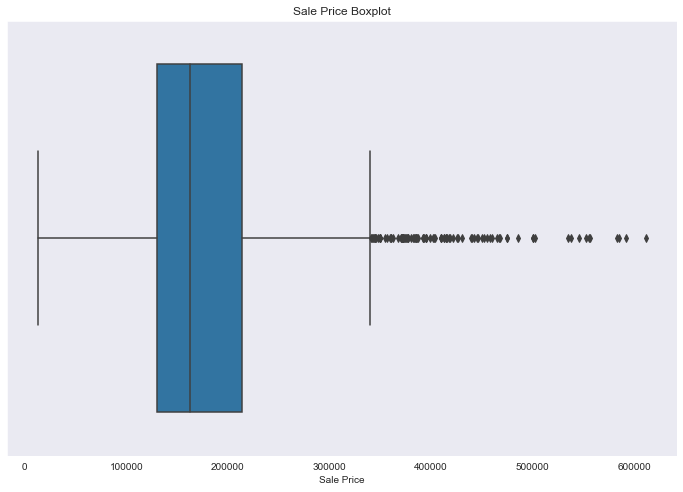

In [42]:
plt.figure(figsize = (12, 8))
sns.boxplot('saleprice', data = housing)
plt.title('Sale Price Boxplot')
plt.xlabel('Sale Price')

There are a significant number of potential outliers in terms of sale price. It is possible that these large sale price values are completely explained through other features in our dataset, but it might be necessary to drop some of the most extreme outliers when training our model.

Exploring the top 10 most correlated variables

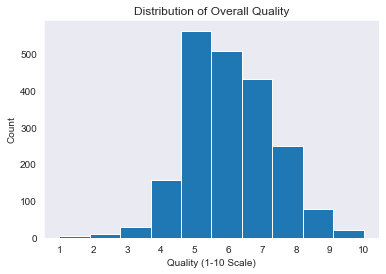

In [43]:
plt.hist(housing['overall_qual'], bins = 10)
plt.title('Distribution of Overall Quality')
plt.xlabel('Quality (1-10 Scale)')
plt.ylabel('Count')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.savefig('../figures/quality_hist', transparent = True)

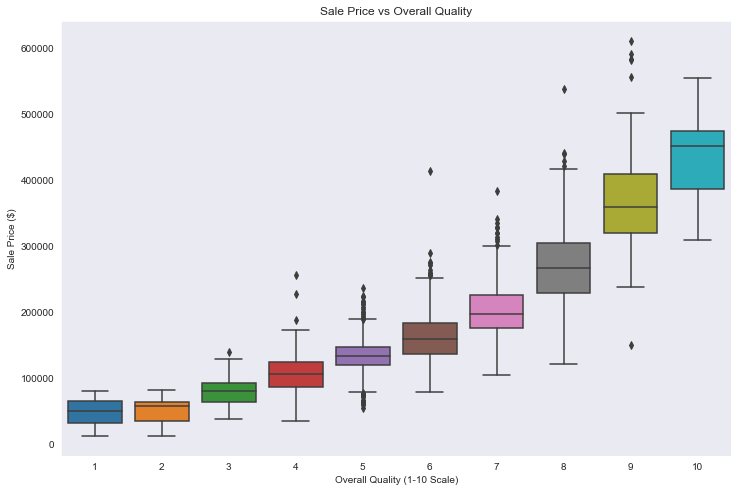

In [44]:
#overall quality

#create a smaller DF with just variables of interest
overall_quality_df = housing[['overall_qual','saleprice']]
overall_quality_df['overall_qual'].value_counts()

#create plot
plt.figure(figsize = (12, 8))
my_plot = sns.boxplot(x = 'overall_qual', y = 'saleprice', data = 
                      overall_quality_df)
plt.xlabel('Overall Quality (1-10 Scale)')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Overall Quality')
plt.savefig('../figures/quality_vs_saleprice', transparent = True)


This graph nicely demonstrates the relationship between the quality of a house and the sale price. most houses with quality < 5 will sell for < $150,000

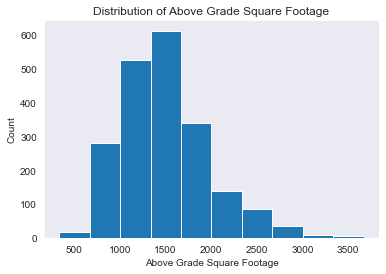

In [45]:
plt.hist(housing['gr_liv_area'])
plt.title('Distribution of Above Grade Square Footage')
plt.xlabel('Above Grade Square Footage')
plt.ylabel('Count')
plt.savefig('../figures/sqft_hist', transparent = True)

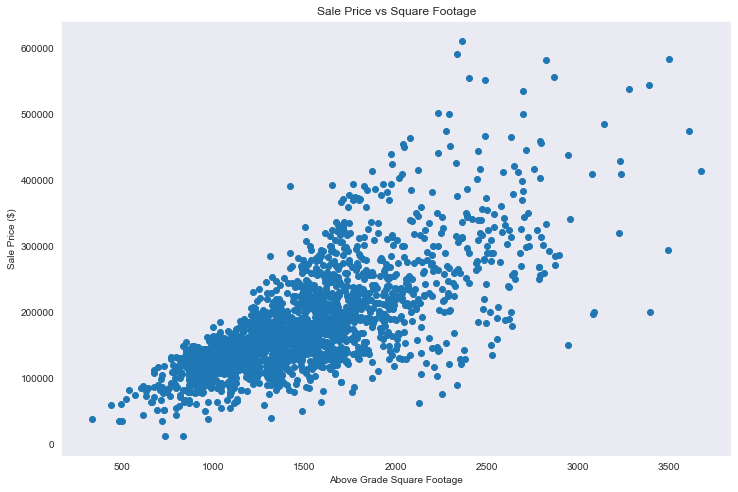

In [46]:
#above grade sf vs price
plt.figure(figsize=(12,8))
plt.scatter(housing['gr_liv_area'], housing['saleprice'])
plt.xlabel('Above Grade Square Footage')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Square Footage')
plt.savefig('../figures/saleprice_vs_sqft', transparent = True)

Here we begin to see some potentially high leverage points, with either very large square footage values and low sale price, or low square footage but relatively very high sale price.

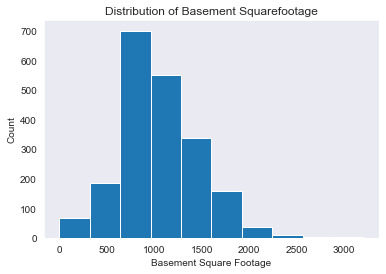

In [47]:
plt.hist(housing['total_bsmt_sf'])
plt.title('Distribution of Basement Squarefootage')
plt.xlabel('Basement Square Footage')
plt.ylabel('Count')
plt.savefig('../figures/basement_hist', transparent = True)

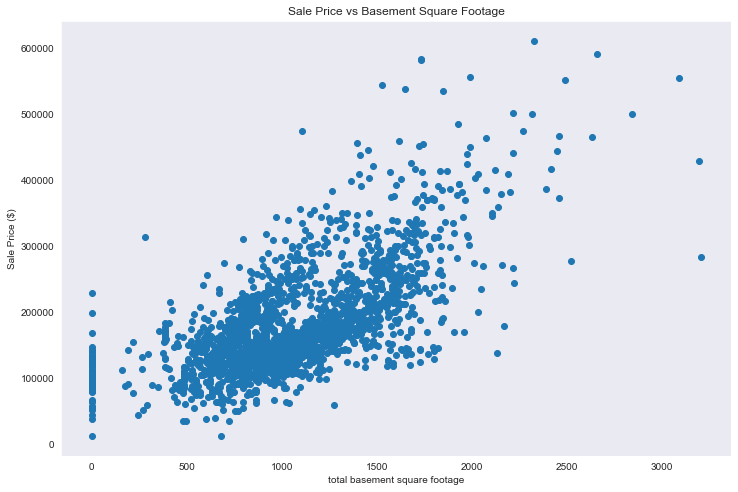

In [48]:
#basement sf
plt.figure(figsize=(12,8))
plt.scatter(housing['total_bsmt_sf'], housing['saleprice'])
plt.xlabel('total basement square footage')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Basement Square Footage')
plt.savefig('../figures/saleprice_vs_bsmt_sqft', transparent = True)

Interestingly, all houses with no basement sold for less than $250,000. seems that for a house to sell for more, it must have at least 500 square feet of basement space

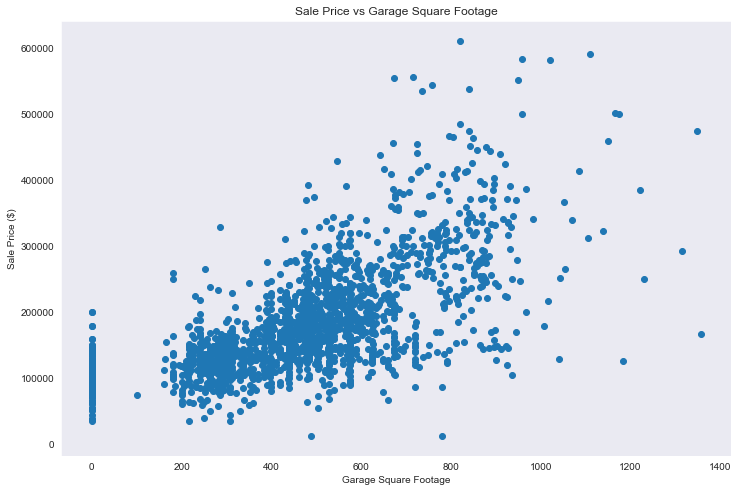

In [49]:
#garage sf
plt.figure(figsize=(12,8))
plt.scatter(housing['garage_area'], housing['saleprice'])
plt.xlabel('Garage Square Footage')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Garage Square Footage')
plt.savefig('../figures/saleprice_vs_garage_sqft')

Again, we begin to notice some potentially high leverage points. Some houses with massive garages sell for very little. Garage square footage displays a similar trend to basement square footage, where a house must have a garage to sell for more than $200,000

Text(0.5, 1.0, 'Sale Price vs External Quality')

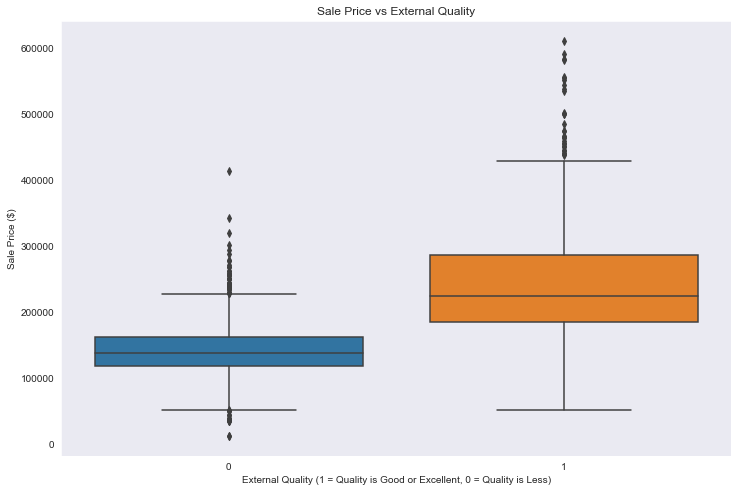

In [50]:
#external quality

plt.figure(figsize = (12, 8))
my_plot = sns.boxplot(x = 'exter_qual', y = 'saleprice', data = housing)
plt.xlabel(
    'External Quality (1 = Quality is Good or Excellent, 0 = Quality is Less)')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs External Quality')

There is a premium on houses with good or excellent external quality. 

Text(0.5, 1.0, 'Sale Price vs # of Full Bathrooms')

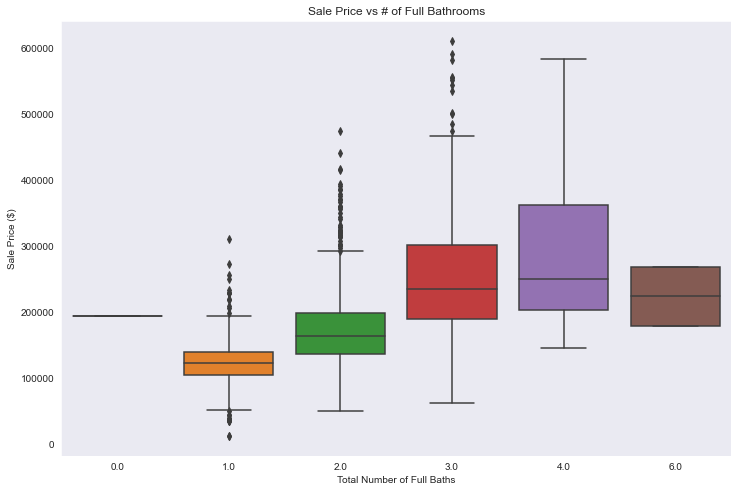

In [51]:
#full bath tot
plt.figure(figsize = (12, 8))
my_plot = sns.boxplot(x = 'full_bath_tot', y = 'saleprice', data = housing)
plt.xlabel('Total Number of Full Baths')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs # of Full Bathrooms')

Unsurprisingly, as the number of Full bathrooms increases, so does the sale price of the house. This is likely because the number of bathrooms has a high degree of multicolinearity with square footage. 

Text(0.5, 1.0, 'Sale Price vs Year Built')

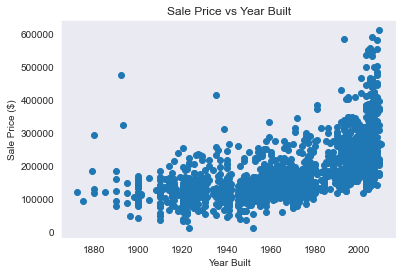

In [52]:
#year built

plt.scatter(housing['year_built'], housing['saleprice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Year Built')

Here we observe a few points that really stand out apart from the overall trend, particularly very old homes that sold for significantly higher than their contemporaries. This will likely be resolved by our next variable, year Remodeled.

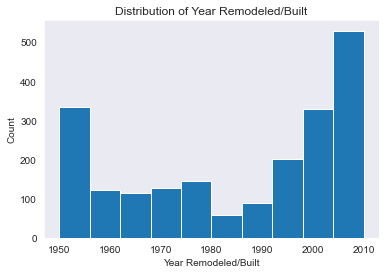

In [53]:
plt.hist(housing['year_remod/add'])
plt.title('Distribution of Year Remodeled/Built')
plt.xlabel('Year Remodeled/Built')
plt.ylabel('Count')
plt.savefig('../figures/year_hist', transparent = True)

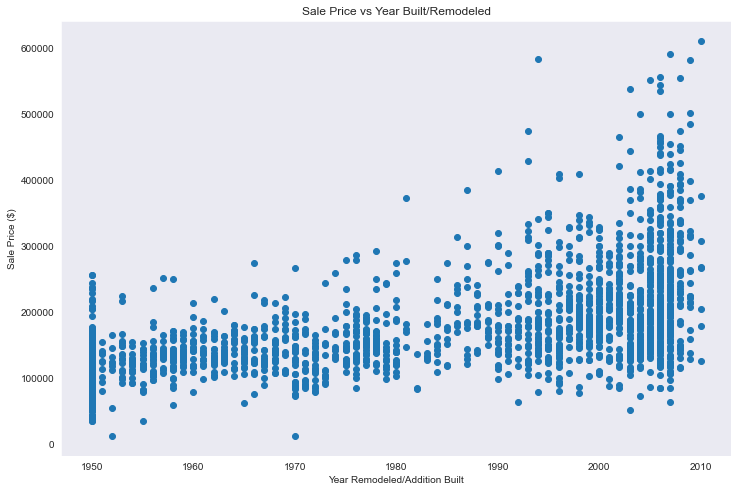

In [54]:
#year remodeled/addition built
plt.figure(figsize=(12,8))
plt.scatter(housing['year_remod/add'], housing['saleprice'])
plt.xlabel('Year Remodeled/Addition Built')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Year Built/Remodeled')
plt.savefig('../figures/saleprice_vs_year_remodeled', transparent = True)

People are willing to pay more for new houses or houses that have been recently remodeled.  The outliers are less extreme in this plt, although there is still a line of points that stands. above the rest.

Text(0.5, 1.0, 'Sale Price vs Basement Size')

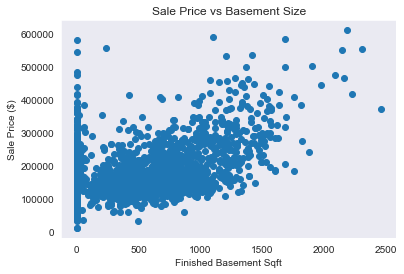

In [55]:
plt.scatter(housing['finished_bsmt_sqft'], housing['saleprice'])
plt.xlabel('Finished Basement Sqft')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs Basement Size')

Again we observe a loosely linear trend, with houses with large basements tending to sell for more. Interestingly, we see houses with no basement selling for the same range of prices as houses with basements.

Text(0.5, 1.0, 'Sale Price vs # of Rooms')

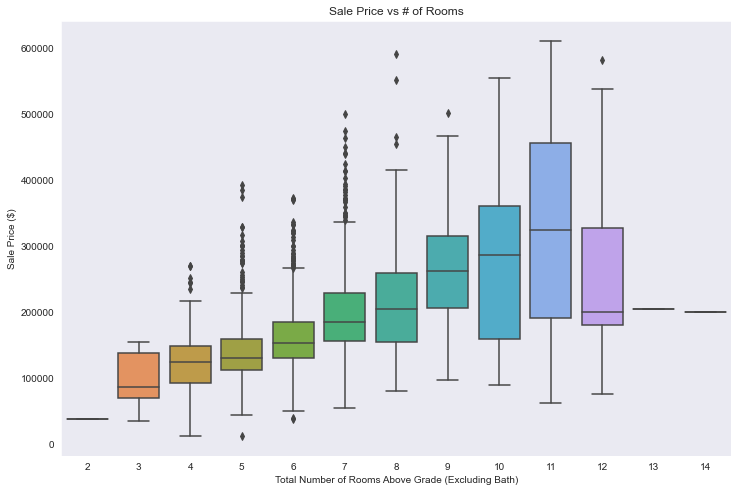

In [56]:
#of rooms
plt.figure(figsize = (12, 8))
my_plot = sns.boxplot(x = 'totrms_abvgrd', y = 'saleprice', data = housing)
plt.xlabel('Total Number of Rooms Above Grade (Excluding Bath)')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price vs # of Rooms')

Number of rooms also displays a loosely linear relationship with sale price, however houses with 12 sell for a much wider, and slighly lower, range of prices than those with 11 or 10 rooms. 

In [57]:
print('done!')

done!
